## Import Libraries

In [1]:
# DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn import preprocessing, tree # https://stackoverflow.com/questions/56683489/use-dtreeviz-to-visualize-decision-tree
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Discretizers
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import ArbitraryDiscretiser

# Visualizers
# import dtreeviz.trees
from dtreeviz.trees import dtreeviz
from IPython.display import Image, display_svg, SVG, display
import ipywidgets as widgets

#stats
from scipy import stats
from numpy import mean

# Helpers
%matplotlib inline 
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, color_codes=True, rc=None)

## Import data 

In [2]:
# Import Data 
credit = pd.read_csv('credit.csv')
credit.head(2)

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default


## Clean Data

In [3]:
# changing columns names
credit.columns=credit.iloc[0]
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [4]:
# rename Pay_0, default payment next month
credit.rename(columns={'PAY_0':'PAY_1', 'SEX':'GENDER',
                       'default payment next month':'DEFAULT'},inplace=True)

In [5]:
credit.head(5)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [6]:
# Dropping attribute info row. Notice Index is 1, not 0, added reset_index
credit = credit.drop([0])
credit.head(3)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [7]:
# Understanding data make up
credit.shape

(30203, 25)

In [8]:
# dropping duplicates
credit = credit.drop_duplicates()
credit.shape

(30002, 25)

In [9]:
# Checking for missing values 
print(credit.isnull().sum())

0
ID           1
LIMIT_BAL    0
GENDER       0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


In [10]:
# Print Null Observation
null_obs = pd.isnull(credit['ID']) # creating bool series True for NaN values
credit[null_obs] # displaying data only with X0 = NaN

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
202,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y


In [11]:
# dropping null values
credit = credit.dropna()
credit.shape

(30001, 25)

In [12]:
# Check variable non-null values and data types
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30001 non-null  object
 1   LIMIT_BAL  30001 non-null  object
 2   GENDER     30001 non-null  object
 3   EDUCATION  30001 non-null  object
 4   MARRIAGE   30001 non-null  object
 5   AGE        30001 non-null  object
 6   PAY_1      30001 non-null  object
 7   PAY_2      30001 non-null  object
 8   PAY_3      30001 non-null  object
 9   PAY_4      30001 non-null  object
 10  PAY_5      30001 non-null  object
 11  PAY_6      30001 non-null  object
 12  BILL_AMT1  30001 non-null  object
 13  BILL_AMT2  30001 non-null  object
 14  BILL_AMT3  30001 non-null  object
 15  BILL_AMT4  30001 non-null  object
 16  BILL_AMT5  30001 non-null  object
 17  BILL_AMT6  30001 non-null  object
 18  PAY_AMT1   30001 non-null  object
 19  PAY_AMT2   30001 non-null  object
 20  PAY_AMT3   30001 non-null  o

## Run Profile Report before additional cleaning data

In [13]:
# profile=pandas_profiling.ProfileReport(credit)
# profile.to_file("CreditProfile_Unclean.html")

# Clean other anomalies

In [14]:
# Descriptive statistics
credit.describe()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,5,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,1,50000,female,university,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [15]:
# Checking Gender Values. There should be only 2
credit.groupby(['GENDER']).size()

GENDER
SEX           1
female    18112
male      11888
dtype: int64

In [16]:
# find row with data anomaly
# To identify a row with certain value https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra
rows_to_drop=credit[credit['GENDER']=='SEX'].index.tolist()
rows_to_drop

[203]

In [17]:
# Drop row with data anomaly
credit = credit.drop(rows_to_drop)

In [18]:
print(credit.loc[200:210, :])

0     ID LIMIT_BAL  GENDER        EDUCATION MARRIAGE AGE PAY_1 PAY_2 PAY_3  \
200  200     30000  female      high school        2  22     1     2     2   
201  201    180000  female  graduate school        1  38    -2    -2    -2   

0   PAY_4  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3  \
200     0  ...     29836      1630         0     1000       85     1714   
201    -2  ...         0         0         0        0        0        0   

0   PAY_AMT4 PAY_AMT5 PAY_AMT6      DEFAULT  
200      104        0        0      default  
201        0        0        0  not default  

[2 rows x 25 columns]


In [19]:
# Checking other attributes
credit.groupby(['EDUCATION']).size()

EDUCATION
graduate school    10585
high school         4917
other                468
university         14030
dtype: int64

In [20]:
# Checking other attributes
credit.groupby(['MARRIAGE']).size()

MARRIAGE
0       54
1    13659
2    15964
3      323
dtype: int64

In [21]:
# Checking other attributes
credit.groupby(['DEFAULT']).size()

DEFAULT
default         6636
not default    23364
dtype: int64

not default    23364
default         6636
Name: DEFAULT, dtype: int64


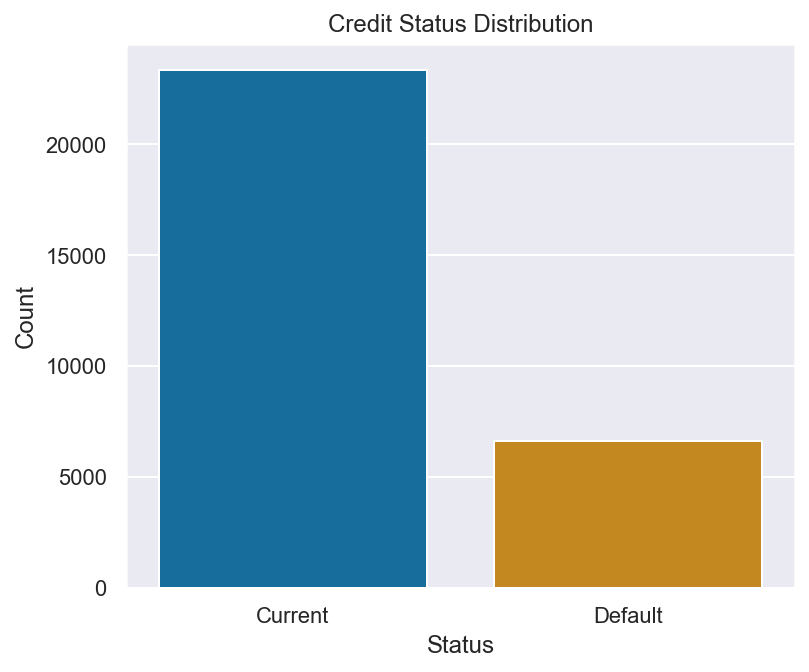

In [22]:
# value-counts(), total counts
print(credit.DEFAULT.value_counts())
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(x='DEFAULT', data=credit, order=['not default','default']) 
ax.set(title='Credit Status Distribution', xlabel= 'Status', ylabel='Count')
ax.set_xticks([0, 1], ['Current', 'Default'])
plt.show()

In [23]:
# Resetting index
credit.reset_index(drop=True, inplace=True)

In [24]:
# converting object dtypes
columns_conv=['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i in columns_conv:
    credit[i]=credit[i].astype(np.int64,errors='ignore')
    
credit.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   GENDER     30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  int64 
 5   AGE        30000 non-null  int64 
 6   PAY_1      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [25]:
# profile
profile=pandas_profiling.ProfileReport(credit)
#profile.to_file("CreditProfile.html")

In [26]:
#profile 

In [27]:
# STILL CAN'T MAKE THIS WORK
# profile.to_widgets()

### Dealing with non-numeric data (Gender, Education and Default)
ref: https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

#### Using category codes approach:

In [28]:
# Converting Objects to Category
# columns_conv=['GENDER', 'EDUCATION', 'DEFAULT']

# for i in columns_conv:
#    credit[i]=credit[i].astype('category',errors='ignore')
    
# credit.info()    

In [29]:
# convert categorical features to a numerical representation 
# ref https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
# credit['GENDER_cat']=credit['GENDER'].cat.codes
# credit.head(10)

#### Using LabelEncoder: (Recomended for Target variable: Default)

In [30]:
# creating instance of labelencoder
label_enc = LabelEncoder()
# Assigning numerical values and storing in another column
credit['DEF_label'] = label_enc.fit_transform(credit['DEFAULT'])
credit.head(10)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,DEF_label
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,0
1,2,120000,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,0
2,3,90000,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,1
3,4,50000,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,1
4,5,50000,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,1
5,6,50000,male,graduate school,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,not default,1
6,7,500000,male,graduate school,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,not default,1
7,8,100000,female,university,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,not default,1
8,9,140000,female,high school,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,not default,1
9,10,20000,male,high school,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,not default,1


In [31]:
# inverting assigned labels
credit['DEF_label'] = credit['DEF_label'].replace({0:1,1:0})
credit.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,DEF_label
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,1
1,2,120000,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,1
2,3,90000,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,0
3,4,50000,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,0
4,5,50000,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,0


#### Using OrdinalEncoder: (EDUCATION)

In [32]:
# creating instance of ordinalencoder
ord_enc = OrdinalEncoder(categories=[(['other','high school','university','graduate school'])],dtype=np.int64) 
# I got the above by reverse engineering ord_enc.categories_ output
# Assigning numerical values and storing in another column
credit['EDU_ord'] = ord_enc.fit_transform(credit['EDUCATION'].values.reshape(-1,1))
ord_enc.categories_

[array(['other', 'high school', 'university', 'graduate school'],
       dtype=object)]

In [33]:
credit.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,DEF_label,EDU_ord
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,default,1,2
1,2,120000,female,university,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,default,1,2
2,3,90000,female,university,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,not default,0,2
3,4,50000,female,university,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,not default,0,2
4,5,50000,male,university,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,not default,0,2


In [34]:
# Checking Correct ordinal encoder
print(credit.EDUCATION.value_counts())
print(credit.EDU_ord.value_counts())

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: int64
2    14030
3    10585
1     4917
0      468
Name: EDU_ord, dtype: int64


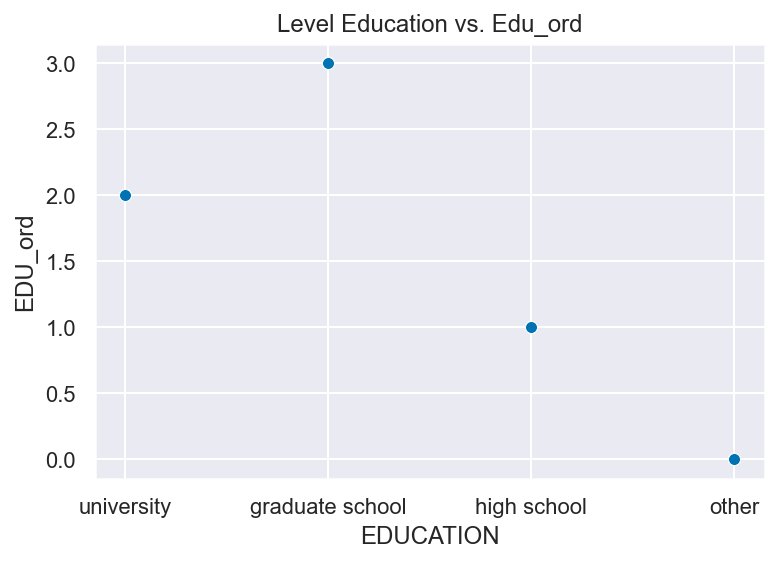

In [35]:
# Checking Correct ordinal encoder graphically
sns.scatterplot(x='EDUCATION', y='EDU_ord', data=credit).set_title('Level Education vs. Edu_ord')
plt.show()

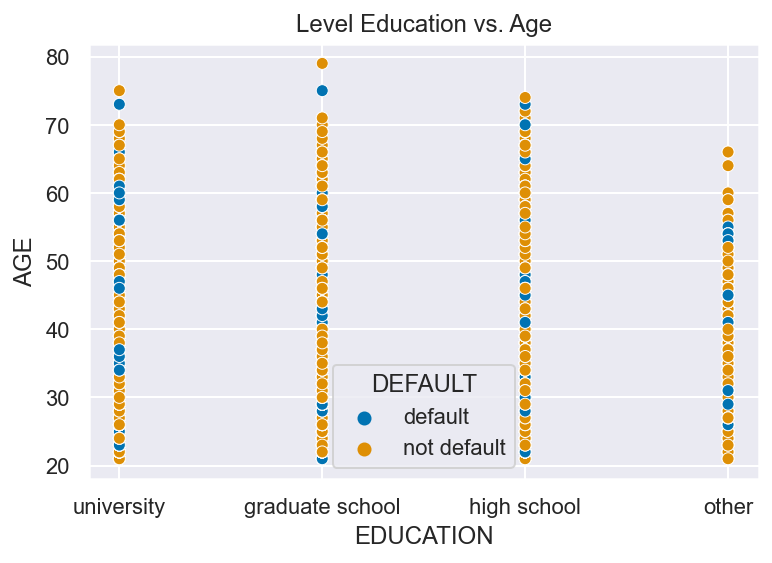

In [36]:
sns.scatterplot(x='EDUCATION', y='AGE', hue='DEFAULT',
                data=credit).set_title('Level Education vs. Age')
plt.show()

### Observations
Since "other" includes people so young, I'm assuming Education Level is < HS, therefore ordinal encoder categories are : categories=[(['other','high school','university','graduate school'])]

#### Using Get_Dummies (Gender)

In [37]:
credit = pd.get_dummies(credit, columns=['GENDER'],prefix=['Gender_is'],drop_first=True)
credit.head()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,DEF_label,EDU_ord,Gender_is_male
0,1,20000,university,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,default,1,2,0
1,2,120000,university,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,default,1,2,0
2,3,90000,university,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,not default,0,2,0
3,4,50000,university,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,not default,0,2,0
4,5,50000,university,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,not default,0,2,1


In [38]:
credit.dtypes

ID                 int64
LIMIT_BAL          int64
EDUCATION         object
MARRIAGE           int64
AGE                int64
PAY_1              int64
PAY_2              int64
PAY_3              int64
PAY_4              int64
PAY_5              int64
PAY_6              int64
BILL_AMT1          int64
BILL_AMT2          int64
BILL_AMT3          int64
BILL_AMT4          int64
BILL_AMT5          int64
BILL_AMT6          int64
PAY_AMT1           int64
PAY_AMT2           int64
PAY_AMT3           int64
PAY_AMT4           int64
PAY_AMT5           int64
PAY_AMT6           int64
DEFAULT           object
DEF_label          int64
EDU_ord            int64
Gender_is_male     uint8
dtype: object

In [39]:
# Writing a clean dataframe
# credit.to_csv('credit1.csv',index=False)

In [40]:
# Useful links
print('https://chrisalbon.com/code/python/data_wrangling/pandas_dropping_column_and_rows/')
print('https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra')
print('https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd')
print('Machine Learning: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/')

https://chrisalbon.com/code/python/data_wrangling/pandas_dropping_column_and_rows/
https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra
https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
Machine Learning: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
